

# Project: TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this project we will be analyzing the data associated with TMDB 5000 Movies , we will be interested in trends about movies properties that affect revenue and voting , analysis of movies properties per year and comparision between movies properties

### Question 1 : what genres are most popular in total years and from year to year ?
### Question 2 : what is the mean profit for each movie genre ?
### Question 3 : what is the mean rating for each movie genre ?
### Question 4 : what are the top 20 highest profit movies and their directors in our dataset and the effect of dollar inflation on result?
### Question 5 : what is the correlation between movies rating and popularity?

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section the data will be loaded and i will check for cleanliness, and then trim and clean the dataset for analysis. 
### General Properties

in the cell bellow we read the dataset and show the first 5 rows of it to investigate rows structure

In [3]:

df=pd.read_csv('tmdb-movies.csv')
df[df['production_companies']=='Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


i noticed that some columns are not important for my analysis and its better to be dropped ,
these columns are ('id','imdb_id','homepage','tagline','keywords','overview')

in the cell below im checking the total number of rows and columns which helps in my investigation

In [4]:

df.shape


(10866, 21)

in the cell below im checking if there are rows with missing values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

it seems like there are some rows with missing values exist and they have string datatype which 
will not give me the ability to replace missing values with mean value of column , so i will remove them instead , also the revenue and budget columns are of type int and they needed to be converted to float

in the cell bellow im checking if there are any dublicated rows

In [6]:
sum(df.duplicated())

1

there is one duplicated row that needs to be removed

its time to see some statistics information about the data

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


i noticed that 25 % and 50 % of datset are zeroes so when i looked at more details on dataset original csv file i found out that budget and revenue columns have a lot of values = 0 which in my case is considered missing values because it will affect my analysis on movies profit so its better to replace these values of zeroes with mean value of related column

the cell bellow shows the distribution of different columns

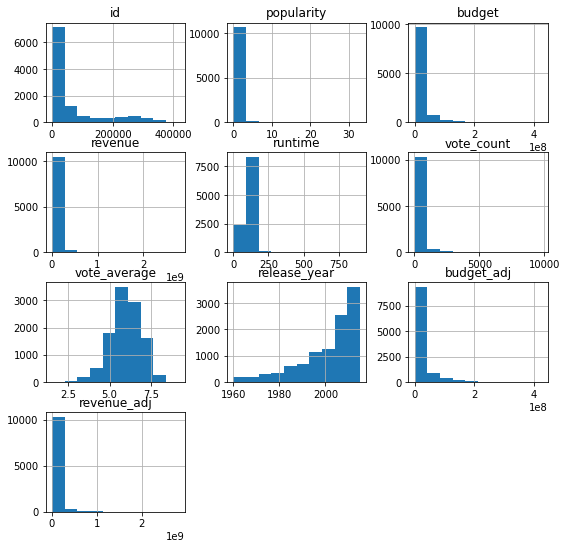

In [8]:
df.hist(figsize=(9,9));

# Data Cleaning 
### actions to be taken for data cleaning
1- removing columns of ('id','imdb_id','homepage','tagline','keywords','overview','cast') which are not needed   
2- removing rows with missing values of these columns ( genres , production_companies , director)  
3- changing revenue and budget columns type to float    
4- removing duplicated rows  
5- replace rows of budget and revenue = 0 with means  

### 1- removing columns of ('id','imdb_id','homepage','tagline','keywords','overview','cast') which are not needed

In [9]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','cast'], axis = 1,inplace=True)


### 2- removing rows with missing values of these columns ( genres , production_companies , director)


In [10]:
df.dropna(inplace=True)
df.isnull().any()

popularity              False
budget                  False
revenue                 False
original_title          False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### Note ( in the above cell )
i performed removing instead of replacing because all columns with missing values are of datatype string    
so they cant be replaced with mean

### 3- changing revenue and budget columns type to float  

In [11]:
df = df.astype({'revenue':float,'budget':float})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   budget                9807 non-null   float64
 2   revenue               9807 non-null   float64
 3   original_title        9807 non-null   object 
 4   director              9807 non-null   object 
 5   runtime               9807 non-null   int64  
 6   genres                9807 non-null   object 
 7   production_companies  9807 non-null   object 
 8   release_date          9807 non-null   object 
 9   vote_count            9807 non-null   int64  
 10  vote_average          9807 non-null   float64
 11  release_year          9807 non-null   int64  
 12  budget_adj            9807 non-null   float64
 13  revenue_adj           9807 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.1+ MB


### 4- removing duplicated rows   

In [12]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

### 5- replace rows of budget and revenue = 0 with means  

In [29]:
df=df.mask(df==0,float("NaN")).fillna(df.mean())
df[df['revenue']==0]['revenue'].count()
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit,profit_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03,9.806000e+03,9.806000e+03
mean,0.693143,2.398067e+07,6.679552e+07,102.880550,238.622578,5.966459,2.877740e+07,8.615842e+07,4.283231e+07,5.740442e+07
std,1.035525,2.909287e+07,1.160392e+08,27.884381,602.081472,0.914291,3.158494e+07,1.426318e+08,9.790390e+07,1.264423e+08
min,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00,-4.139124e+08,-4.139124e+08
25%,0.231581,1.612525e+07,3.540659e+07,90.000000,18.000000,5.400000,1.935070e+07,4.954604e+07,1.145344e+07,1.622138e+07
50%,0.418756,1.612525e+07,4.407785e+07,100.000000,46.000000,6.000000,1.935070e+07,5.685528e+07,2.795260e+07,3.750458e+07
75%,0.774231,1.900000e+07,4.407785e+07,112.000000,172.000000,6.600000,2.439107e+07,5.685528e+07,3.407785e+07,4.607689e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : what genres are most popular in total years and from year to year ?

firstly i will create new column named main_genres which will contain the first genre string before '|' seperator assuming that the other genres are sub-genres

In [14]:
main_genres_data=[]
for genre in df['genres']:
    main_genres_data.append(genre.split('|')[0])
df['main_genres']=main_genres_data
df['main_genres'][0:5]

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: main_genres, dtype: object

getting most popular main_genres in all years

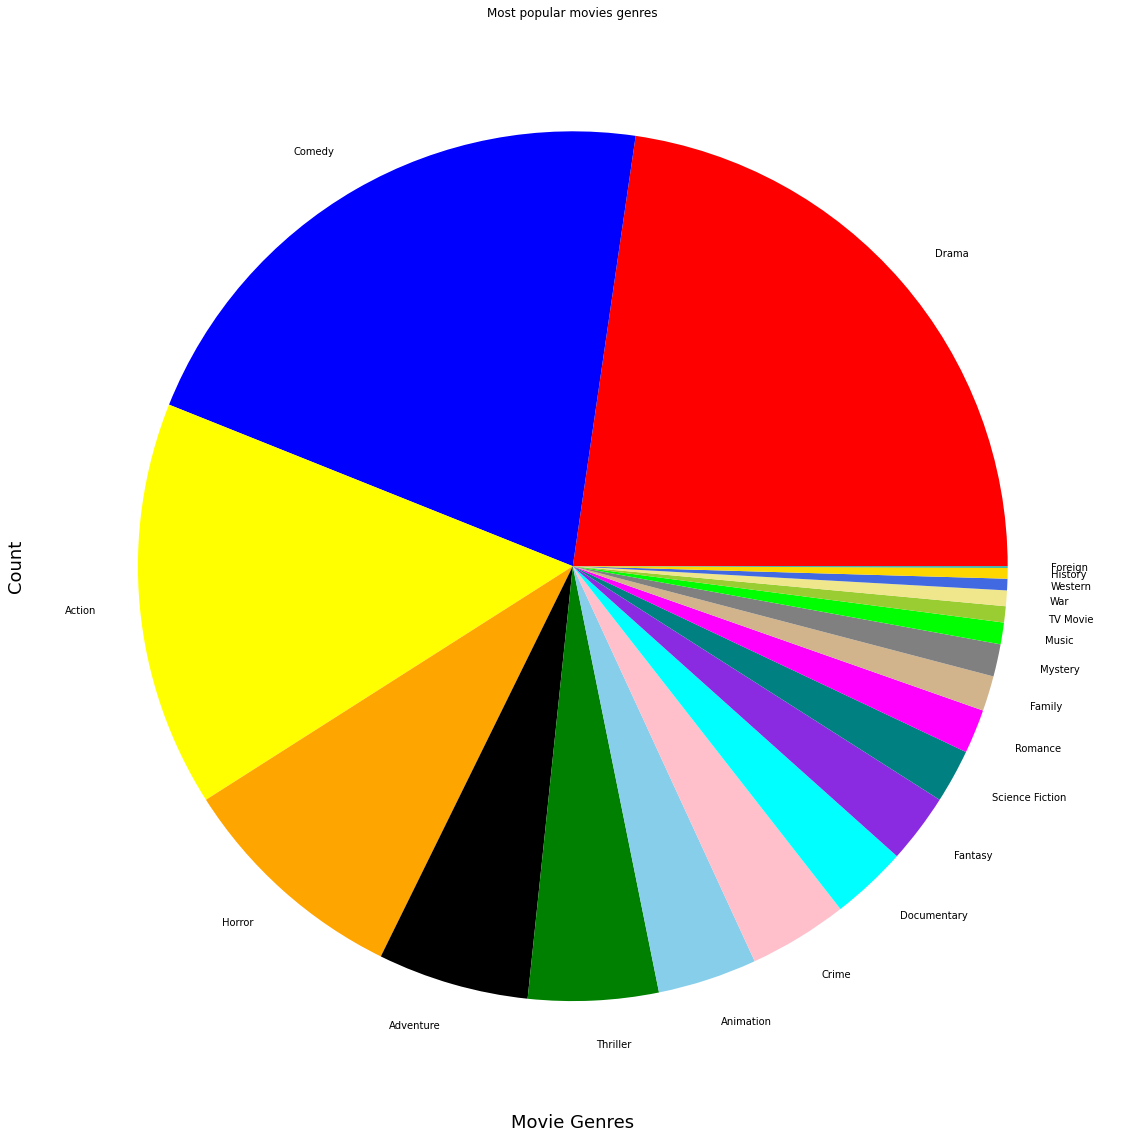

In [15]:
colors=['red','blue','yellow','orange','black','green','skyblue','pink','aqua','blueviolet','teal','magenta','tan','grey','lime','yellowgreen','khaki','royalblue','gold','lightseagreen']
df = df.astype({'release_year':str})
# converting release_year column to type str to easily use it as categorial data in bar charts
df['main_genres'].value_counts().plot(kind='pie',figsize=(20,20), title='Most popular movies genres',colors=colors);
plt.xlabel('Movie Genres',fontsize=18);
plt.ylabel('Count',fontsize=18);


getting the most popular movies genres in every year
### Note :
i will divide the answer to two plots because we have around 49 years so it is too much for one plot , im using a stacked bar chart to show the count of different movies genres over years

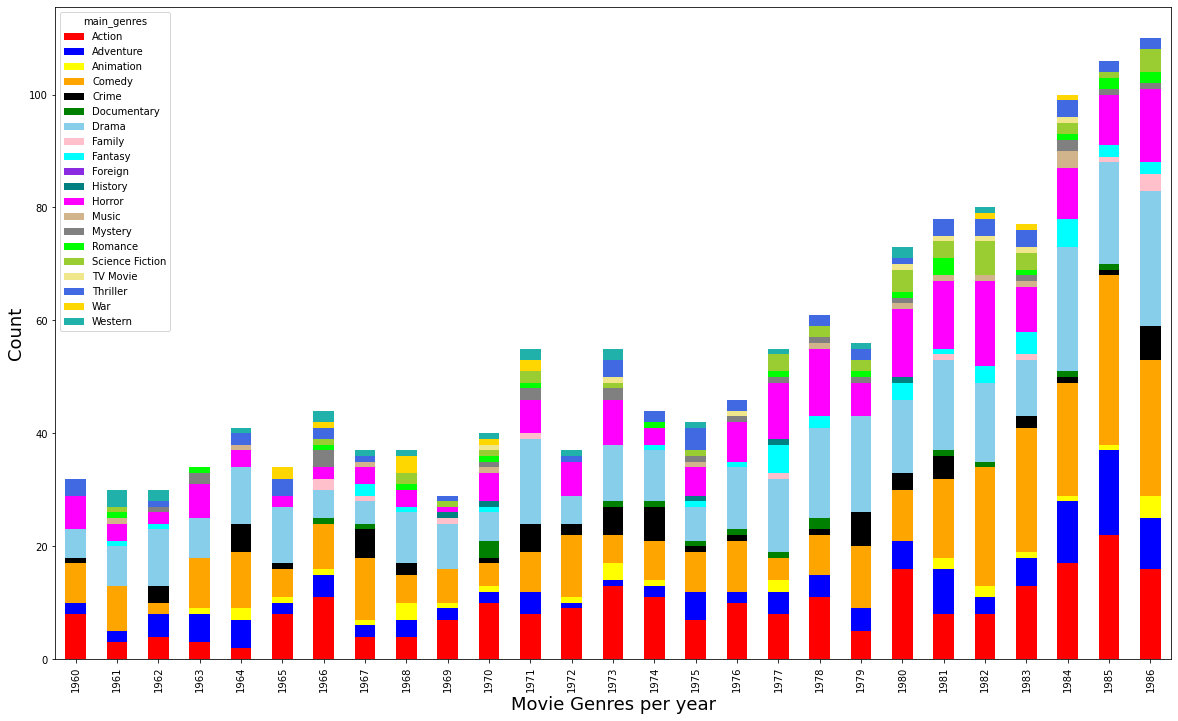

In [16]:
colors=['red','blue','yellow','orange','black','green','skyblue','pink','aqua','blueviolet','teal','magenta','tan','grey','lime','yellowgreen','khaki','royalblue','gold','lightseagreen']
most_popular_genres1=df.groupby(['release_year','main_genres'])['main_genres'].apply(lambda x: x.value_counts()[0]).unstack('main_genres')
most_popular_genres1[0:27].plot(kind='bar',stacked=True,figsize=(20,12),color=colors);
plt.xlabel('Movie Genres per year',fontsize=18);
plt.ylabel('Count',fontsize=18);


plotting the rest of the years 

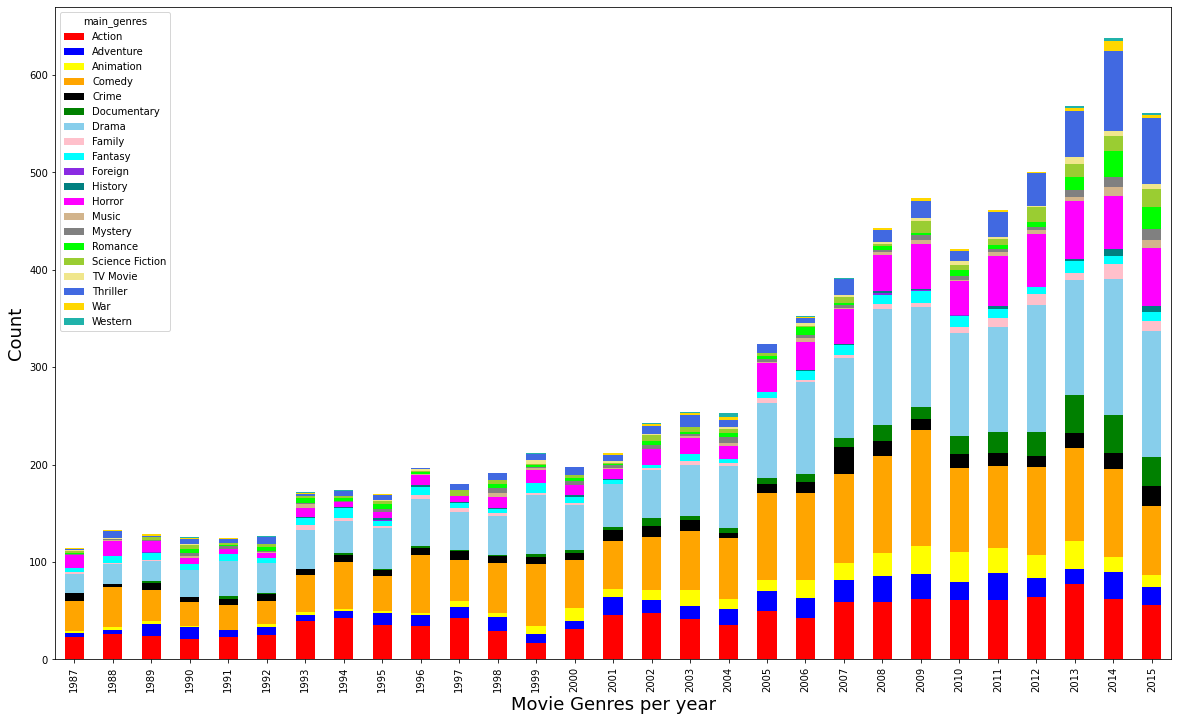

In [17]:
colors=['red','blue','yellow','orange','black','green','skyblue','pink','aqua','blueviolet','teal','magenta','tan','grey','lime','yellowgreen','khaki','royalblue','gold','lightseagreen']
most_popular_genres1=df.groupby(['release_year','main_genres'])['main_genres'].apply(lambda x: x.value_counts()[0]).unstack('main_genres')
most_popular_genres1[27:].plot(kind='bar',stacked=True,figsize=(20,12),color=colors);
plt.xlabel('Movie Genres per year',fontsize=18);
plt.ylabel('Count',fontsize=18);

### Research Question 2  (what is the mean profit for each movie genre?)

firstly we need to add two new columns , one for profit without considering dollar inflation  
and one for profit with reference to 2010 dollars value ( profit_adj )


In [18]:
df['profit']=df['revenue']-df['budget']
df['profit_adj']=df['revenue_adj']-df['budget_adj']
df.head(1)


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genres,profit,profit_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1.363529e+09,1.254446e+09


drawing a bar chart to show the mean profit of different movies genres in all years ( without accounting for dollar inflation )

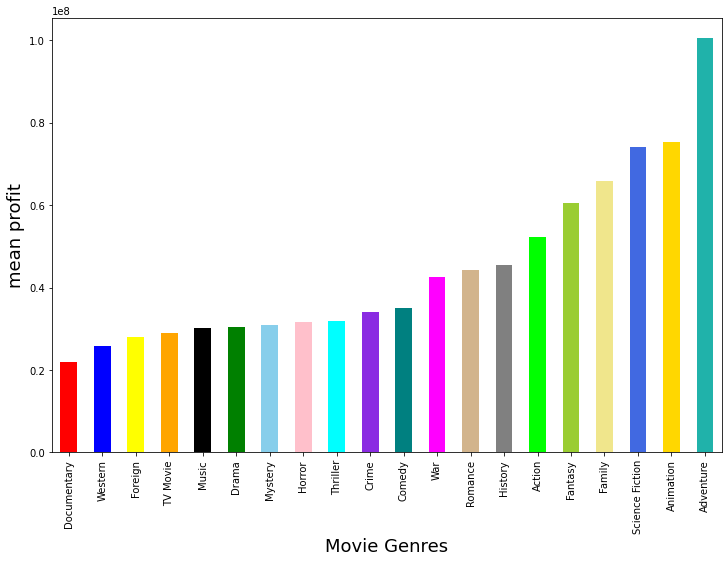

In [19]:
genres_profit=df.groupby('main_genres')['profit'].mean().sort_values()
genres_profit.plot(kind='bar',figsize=(12,8),color=colors);
plt.xlabel('Movie Genres',fontsize=18);
plt.ylabel('mean profit',fontsize=18);

drawing a bar chart to show the mean profit of different movies genres in all years ( with accounting for dollar inflation )  
with reference to 2010 dollars 

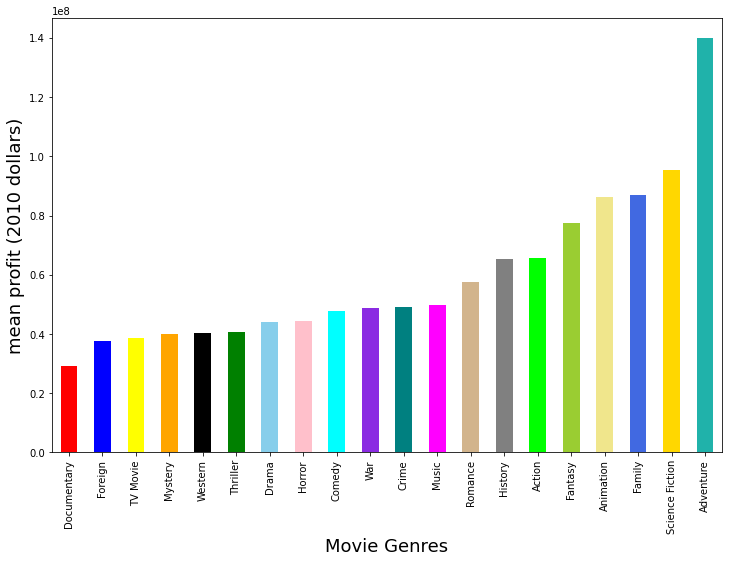

In [20]:
genres_profit_adj=df.groupby('main_genres')['profit_adj'].mean().sort_values()
genres_profit_adj.plot(kind='bar',figsize=(12,8),color=colors);
plt.xlabel('Movie Genres',fontsize=18);
plt.ylabel('mean profit (2010 dollars)',fontsize=18);

### Research Question 3 : what is the mean rating for each movie genre ?

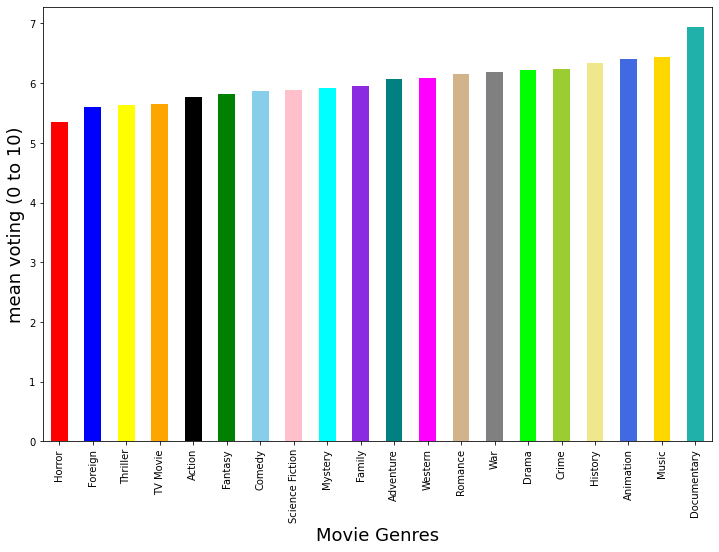

In [21]:
genres_mean_rating=df.groupby('main_genres')['vote_average'].mean().sort_values()
genres_mean_rating.plot(kind='bar',figsize=(12,8),color=colors);
plt.xlabel('Movie Genres',fontsize=18);
plt.ylabel('mean voting (0 to 10)',fontsize=18);

### Research Question 4 : what are the top 20 highest profit movies in our dataset ?

without accounting for dollar inflation

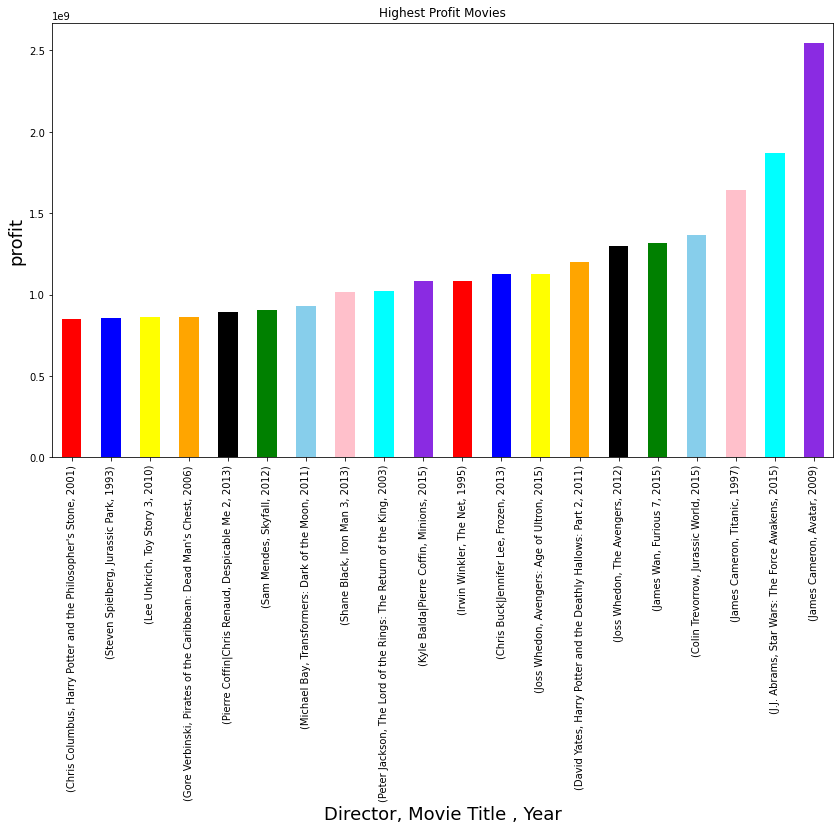

In [22]:
df_largest=df.nlargest(20, ['profit'])
df_largest.groupby(['director','original_title','release_year'])['profit'].max().sort_values().plot(kind='bar',figsize=(14,8),color=colors[0:10],title='Highest Profit Movies');
# max() doesnt affect any thing the purpose was grouping by the data
plt.xlabel('Director, Movie Title , Year',fontsize=18);
plt.ylabel('profit',fontsize=18);

with accounting for dollar inflation ( with reference to 2010 )

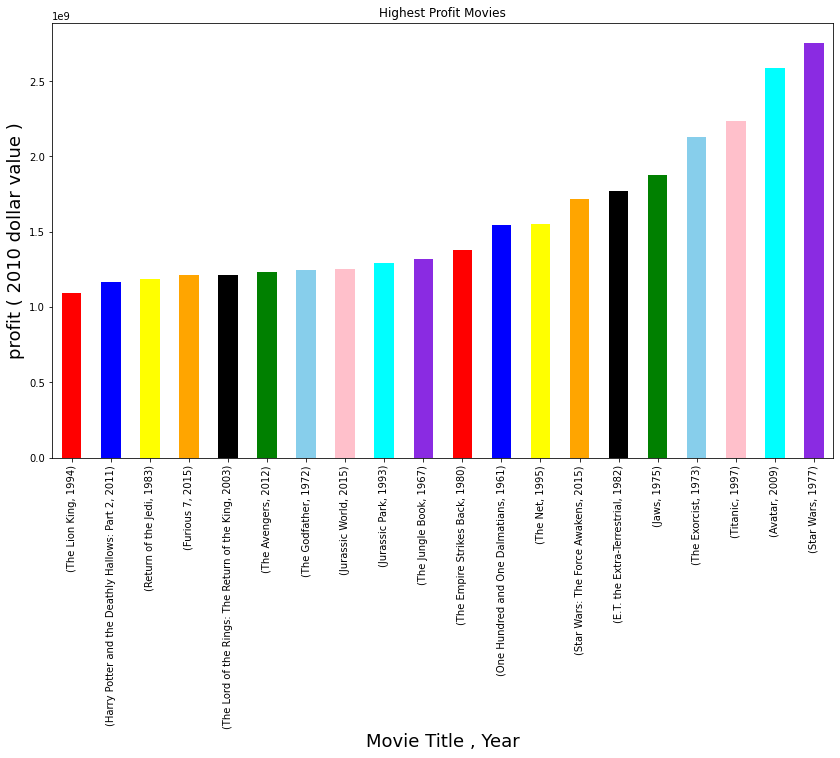

In [23]:
df_largest2=df.nlargest(20, ['profit_adj'])
df_largest2.groupby(['original_title','release_year'])['profit_adj'].max().sort_values().plot(kind='bar',figsize=(14,8),color=colors[0:10],title='Highest Profit Movies');
# max() doesnt affect any thing the purpose was grouping by the data
plt.xlabel('Movie Title , Year',fontsize=18);
plt.ylabel('profit ( 2010 dollar value )',fontsize=18);

### Research Question 5 : What is the correlation between movie rating and its popularity?

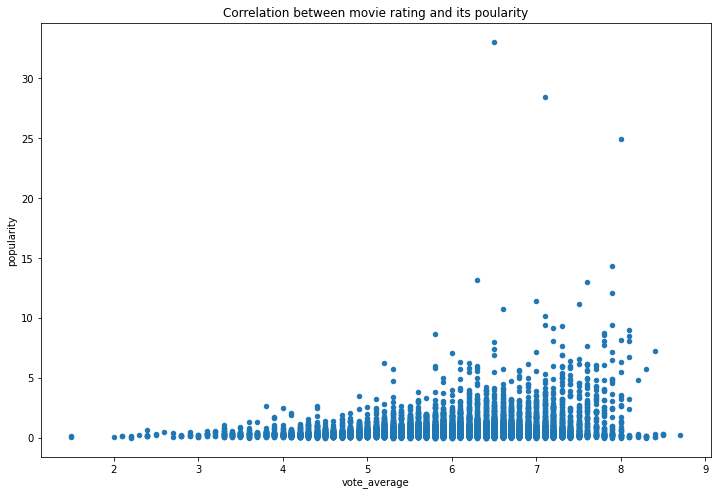

In [24]:
df.plot(x='vote_average',y='popularity',kind='scatter',figsize=(12,8),title='Correlation between movie rating and its poularity');

<a id='conclusions'></a>
## Conclusions

1- Drama , Comedy and Action movies are the most popular movies over years in our dataset  
2-Horror , Thriller and Romance movies increased a lot over years  
3-Adventure , Science fiction and Family movies have the highest mean profit over years  
4- Documentry , Music and Animation movies have the highest mean rating over years  
5- Top 20 profit movies changed when accounting for dollar inflation  
6- movies voting average ( rating ) and popularity are slightly positively correlated

